In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import random


In [2]:
data = pd.read_csv("C:\\Users\\AHMEED\\Desktop\\Diagnostics\\HeartDetector\\heart.csv")

In [3]:
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
missing_values = data.isnull().any(axis=1)
print("Rows with missing values")
print(missing_values)

Rows with missing values
0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


In [5]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows")
print(duplicate_rows)

Duplicate rows
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


Correlation between Cholesterol and Blood Pressure:  0.08851313509917678


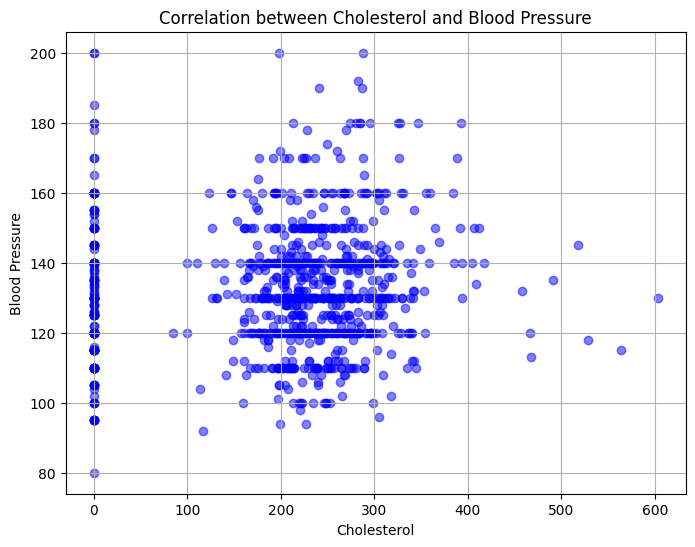

In [6]:
correlation_df = data[["Cholesterol" , "RestingBP"]]
correlation = correlation_df["Cholesterol"].corr(correlation_df["RestingBP"])
print(f"Correlation between Cholesterol and Blood Pressure:  {correlation}")
plt.figure(figsize=(8,6))
plt.scatter(correlation_df["Cholesterol"], correlation_df["RestingBP"]  , color="blue" , alpha=0.5)
plt.title("Correlation between Cholesterol and Blood Pressure")
plt.xlabel("Cholesterol")
plt.ylabel("Blood Pressure")
plt.grid(True)
plt.show()

In [7]:
age_groups = pd.cut(data["Age"] , bins=[0,30,40,50,60,70,80] ,labels=["<30" , "30-40" ,"40-50","50-60","60-70","70-80"])
heart_disease_counts = data[data["HeartDisease"]==1].groupby([age_groups,"Sex"]).size().unstack()
most_common_chest_pain = data.groupby(age_groups)["ChestPainType"].apply(lambda x: x.mode().iloc[0])
average_hr_by_age = data.groupby(age_groups)["MaxHR"].mean()

C:\Users\AHMEED\AppData\Local\Temp\ipykernel_26360\767277596.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_disease_counts = data[data["HeartDisease"]==1].groupby([age_groups,"Sex"]).size().unstack()
C:\Users\AHMEED\AppData\Local\Temp\ipykernel_26360\767277596.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_chest_pain = data.groupby(age_groups)["ChestPainType"].apply(lambda x: x.mode().iloc[0])
C:\Users\AHMEED\AppData\Local\Temp\ipykernel_26360\767277596.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

In [8]:
print("Heart disease case and most common chest pain type by age group and gender")
print(pd.concat([heart_disease_counts,most_common_chest_pain,average_hr_by_age], axis=1))

Heart disease case and most common chest pain type by age group and gender
        F    M ChestPainType       MaxHR
Age                                     
<30     0    0           ATA  177.400000
30-40   4   28           ASY  155.056818
40-50   7   86           ASY  144.757848
50-60  20  202           ASY  134.291339
60-70  18  127           ASY  125.609137
70-80   1   15           ASY  119.500000


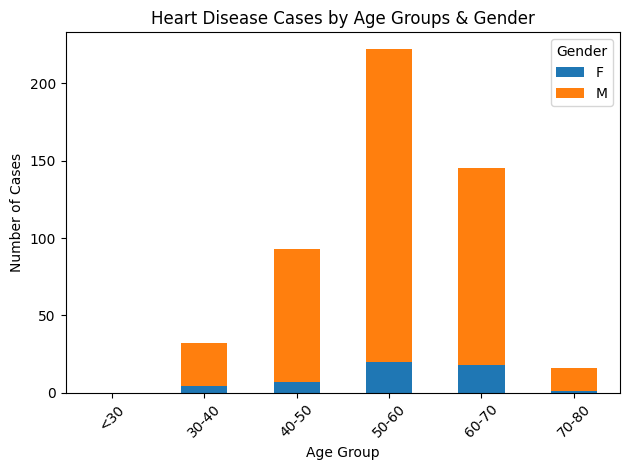

In [9]:
heart_disease_counts.plot(kind="bar" , stacked=True)
plt.title("Heart Disease Cases by Age Groups & Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Ranked list of features by importances: 
           Feature  Importances
10        ST_Slope     0.240129
2    ChestPainType     0.122824
9          Oldpeak     0.115125
7            MaxHR     0.110851
4      Cholesterol     0.104651
0              Age     0.080100
3        RestingBP     0.070902
8   ExerciseAngina     0.068757
1              Sex     0.037251
6       RestingECG     0.026913
5        FastingBS     0.022497


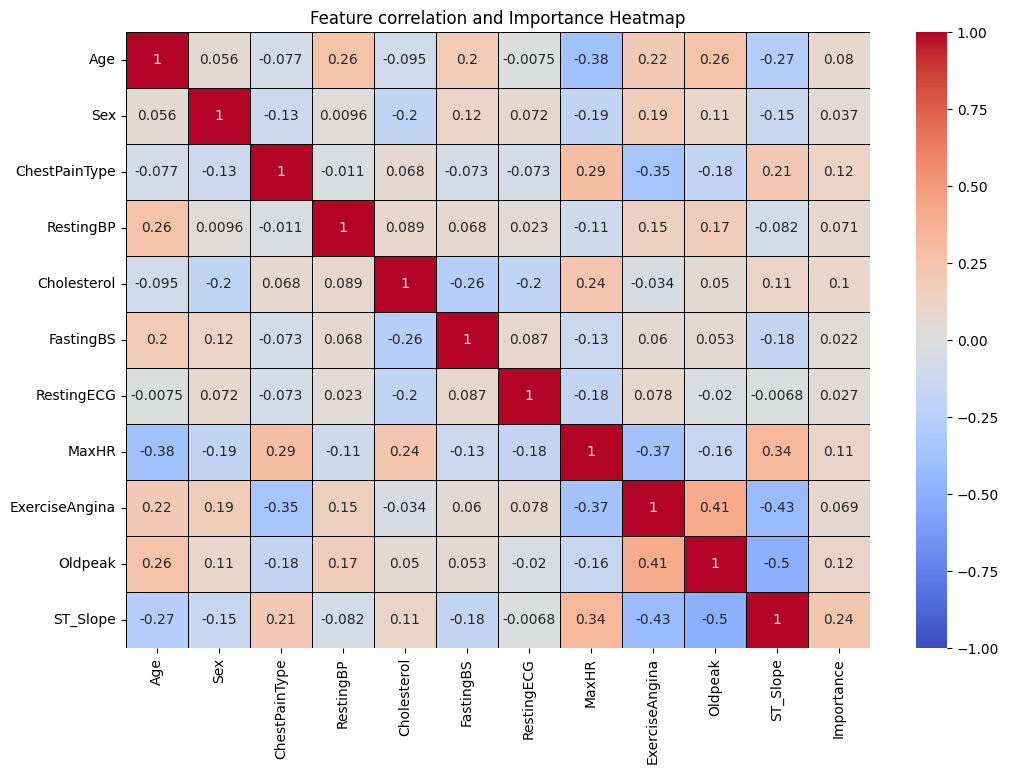

In [10]:
label_encoder = LabelEncoder()
data["Sex"] =label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] =label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] =label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] =label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] =label_encoder.fit_transform(data["ST_Slope"])
X=data.drop("HeartDisease" , axis=1)
y= data["HeartDisease"]
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X,y)
feature_importances = rf_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'Feature':X.columns , 'Importances': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by="Importances" , ascending=False)
print("Ranked list of features by importances: ")
print(feature_importances_df)
corr_matrix = X.corr()
importances_matrix = pd.DataFrame(corr_matrix)
importances_matrix['Importance'] = feature_importances
plt.figure(figsize=(12,8))
sns.heatmap(importances_matrix , annot=True , cmap='coolwarm' , vmin=-1 ,vmax=1 , center=0 , linewidths=0.5 , linecolor="black")
plt.title("Feature correlation and Importance Heatmap")
plt.show()



In [11]:
X = data.drop("HeartDisease" , axis=1)
y=data["HeartDisease"]
categories={
    "ChestPainType":['ATA','NAP','ASY','TA'],
    "Sex":['M','F'],
    "RestingECG":['Normal' , 'ST' , 'LVH'],
    "ExerciseAngina":['N','Y'],
    "ST_Slope":['Up' , 'Flat' , 'Down']
}

X=pd.get_dummies(X , columns=categories.keys())
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2 ,random_state=42)
rf_class = RandomForestClassifier()
rf_class.fit(X_train , y_train)

random_data={
    "Age" : np.random.randint(20,80),
    "Sex" : np.random.choice(categories["Sex"]),
    "ChestPainType" : np.random.choice(categories["ChestPainType"]),
    "RestingBP" : np.random.randint(100 , 200),
    "Cholesterol" : np.random.randint(100 , 300),
    "FastingBS": np.random.choice([0,1]),
    "RestingECG" : np.random.choice(categories["RestingECG"]),
    "MaxHR" : np.random.randint(60,220),
    "ExerciseAngina" : np.random.choice(categories["ExerciseAngina"]),
    "OldPeak": np.random.uniform(0,5),
    "ST_Slope": np.random.choice(categories["ST_Slope"])
}

random_df = pd.DataFrame([random_data])
random_df = pd.get_dummies(random_df , columns=categories.keys())
missed_features = set(X_train.columns) - set(random_df.columns)
for feature in missed_features:
    random_df[feature]=0
random_df = random_df[X_train.columns]
random_prediction = rf_class.predict(random_df)
def print_features (random_data):
    for feature , value in random_data.items():
        print(f"{feature} ={value}")
print("Randomly Generated Patient Data:")
print_features(random_data)
if random_prediction[0] ==1:
    print("Heart Disease Detected")
else:
    print("Normal")



Randomly Generated Patient Data:
Age =55
Sex =F
ChestPainType =TA
RestingBP =131
Cholesterol =187
FastingBS =1
RestingECG =LVH
MaxHR =100
ExerciseAngina =N
OldPeak =1.2456220850148547
ST_Slope =Up
Heart Disease Detected


Accuracy: 0.8696
Precision: 0.8952
Recall: 0.8785
F1 Score: 0.8868
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.84      0.86      0.85        77
     Disease       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



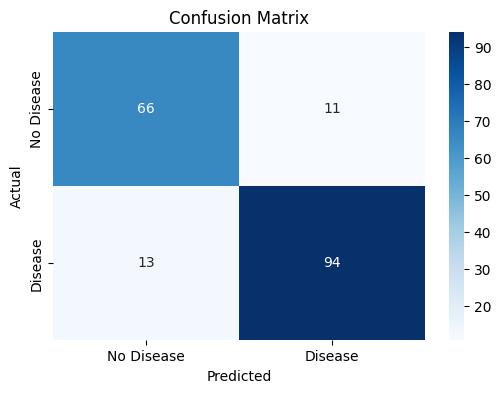

In [12]:
X = data.drop("HeartDisease" , axis=1)
y=data["HeartDisease"]
categories={
    "ChestPainType":['ATA','NAP','ASY','TA'],
    "Sex":['M','F'],
    "RestingECG":['Normal' , 'ST' , 'LVH'],
    "ExerciseAngina":['N','Y'],
    "ST_Slope":['Up' , 'Flat' , 'Down']
}

X=pd.get_dummies(X , columns=categories.keys())
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2 ,random_state=42)
rf_class = RandomForestClassifier()
rf_class.fit(X_train , y_train)

y_pred = rf_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

